In [1]:
import matplotlib.pyplot as plt
import scvelo as scv
import scanpy as sc
import cellrank as cr

#d
# set verbosity levels
cr.settings.verbosity = 2
scv.settings.verbosity = 3

# figure settings
scv.settings.set_figure_params(
    "scvelo", dpi_save=400, dpi=80, transparent=True, fontsize=20, color_map="viridis"
)
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
sc.settings.figdir="/home/gilberthan/Desktop/disk1/limb/3.9_wt_integrate/result/5.23_pesduotime/"
scv.settings.figdir="/home/gilberthan/Desktop/disk1/limb/3.9_wt_integrate/result/5.23_pesduotime/"
cr.settings.figdir="/home/gilberthan/Desktop/disk1/limb/3.9_wt_integrate/result/5.23_pesduotime/"

In [2]:
# import  data
adata=sc.read("../../important_processed_data/5.22_integrate_adata.h5ad")

In [224]:
lineage_meta=pd.read_csv("../../important_processed_data/6.10_lineageMeta.csv",index_col=0)

In [4]:
adata.obs

orig.ident  \
Unnamed: 0                                                             
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0   Suture2021_Farmer_E17   
Suture2021_Farmer_E17_AAACCTGGTGCGGTAA-1_1-0   Suture2021_Farmer_E17   
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0   Suture2021_Farmer_E17   
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0   Suture2021_Farmer_E17   
Suture2021_Farmer_E17_AAACCTGTCGTTACGA-1_1-0   Suture2021_Farmer_E17   
...                                                              ...   
TTTGACTGTATTTCCT-1_5-1-2                      Metaphysis_Yang_sorted   
TTTGACTGTTGCATTG-1_5-1-2                      Metaphysis_Yang_sorted   
TTTGACTTCTTGGGCG-1_5-1-2                      Metaphysis_Yang_sorted   
TTTGGAGCAGCGACAA-1_5-1-2                      Metaphysis_Yang_sorted   
TTTGGTTCACTACTTT-1_5-1-2                      Metaphysis_Yang_sorted   

                                              nCount_originalexp  \
Unnamed: 0                                                         
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0             11668.0   
Suture2021_Farmer_E17_AAACCTGGTGCGGTAA-1_1-0             14744.0   
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0             14962.0   
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0             14473.0   
Suture2021_Farmer_E17_AAACCTGTCGTTACGA-1_1-0             14249.0   
...                                                          ...   
TTTGACTGTATTTCCT-1_5-1-2                                 11255.0   
TTTGACTGTTGCATTG-1_5-1-2                                  2748.0   
TTTGACTTCTTGGGCG-1_5-1-2                                 18312.0   
TTTGGAGCAGCGACAA-1_5-1-2                                 70471.0   
TTTGGTTCACTACTTT-1_5-1-2                                138528.0   

                                              nFeature_originalexp  \
Unnamed: 0                                                           
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0                  3222   
Suture2021_Farmer_E17_AAACCTGGTGCGGTAA-1_1-0                  3910   
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0                  3533   
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0                  3565   
Suture2021_Farmer_E17_AAACCTGTCGTTACGA-1_1-0                  3968   
...                                                            ...   
TTTGACTGTATTTCCT-1_5-1-2                                      3122   
TTTGACTGTTGCATTG-1_5-1-2                                      1298   
TTTGACTTCTTGGGCG-1_5-1-2                                      4340   
TTTGGAGCAGCGACAA-1_5-1-2                                      6264   
TTTGGTTCACTACTTT-1_5-1-2                                      8254   

                                                              Sample  \
Unnamed: 0                                                             
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0   Suture2021_Farmer_E17   
Suture2021_Farmer_E17_AAACCTGGTGCGGTAA-1_1-0   Suture2021_Farmer_E17   
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0   Suture2021_Farmer_E17   
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0   Suture2021_Farmer_E17   
Suture2021_Farmer_E17_AAACCTGTCGTTACGA-1_1-0   Suture2021_Farmer_E17   
...                                                              ...   
TTTGACTGTATTTCCT-1_5-1-2                      Metaphysis_Yang_sorted   
TTTGACTGTTGCATTG-1_5-1-2                      Metaphysis_Yang_sorted   
TTTGACTTCTTGGGCG-1_5-1-2                      Metaphysis_Yang_sorted   
TTTGGAGCAGCGACAA-1_5-1-2                      Metaphysis_Yang_sorted   
TTTGGTTCACTACTTT-1_5-1-2                      Metaphysis_Yang_sorted   

                                                        Project  Limb.Atlas  \
Unnamed: 0                                                                    
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0  Suture2021_Farmer       False   
Suture2021_Farmer_E17_AAACCTGGTGCGGTAA-1_1-0  Suture2021_Farmer       False   
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0  Suture2021_Farmer       Fa

In [5]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['C90_named']  == 'Bglap3.Ob')[0]

In [6]:
adata_obs = pd.concat([adata.obs,lineage_meta], axis=1)


In [7]:
adata

AnnData object with n_obs × n_vars = 272369 × 62934
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'le

In [8]:
lineage=lineage_meta["lineage_chondro"]|lineage_meta["lineage_laFibro"]|lineage_meta["lineage_lepr"]|lineage_meta["lineage_mesenchyme"]

In [177]:
lineage

Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0     True
Suture2021_Farmer_E17_AAACCTGGTGCGGTAA-1_1-0    False
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0     True
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0     True
Suture2021_Farmer_E17_AAACCTGTCGTTACGA-1_1-0    False
                                                ...  
TTTGACTGTATTTCCT-1_5-1-2                         True
TTTGACTGTTGCATTG-1_5-1-2                         True
TTTGACTTCTTGGGCG-1_5-1-2                         True
TTTGGAGCAGCGACAA-1_5-1-2                         True
TTTGGTTCACTACTTT-1_5-1-2                         True
Length: 272369, dtype: bool

In [9]:
def map_bool_to_string(bool_val):
    return "TURE" if bool_val else "FLASE"

# Use the map function to apply the mapping to each value in the list
lineage_string = list(map(map_bool_to_string, lineage))


/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


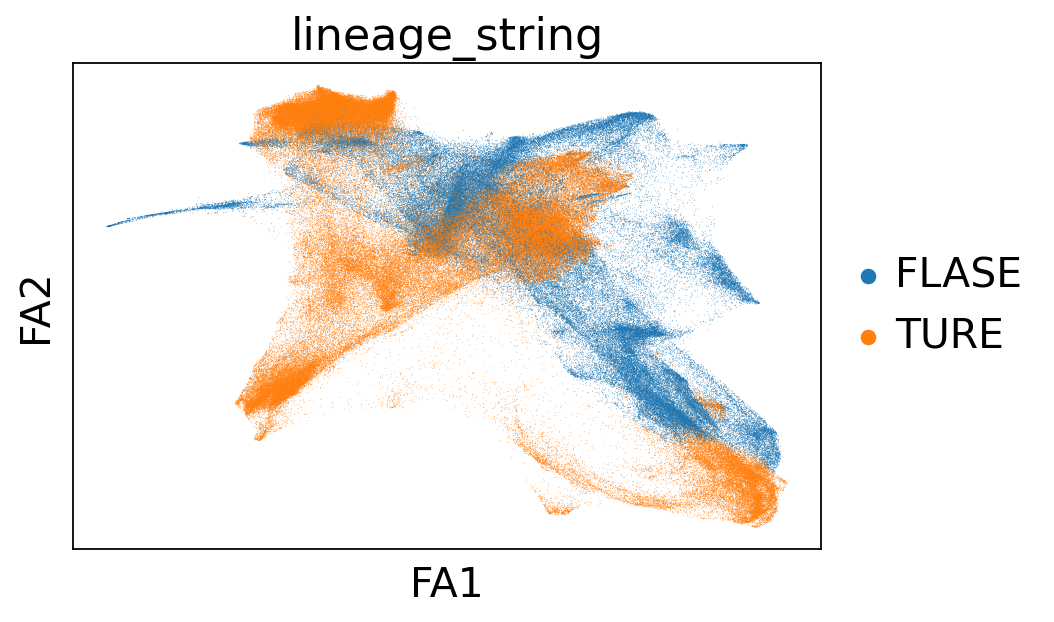

In [52]:
sc.pl.draw_graph(adata,color="lineage_string",save="6.17_lineage_cell_fa.pdf")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


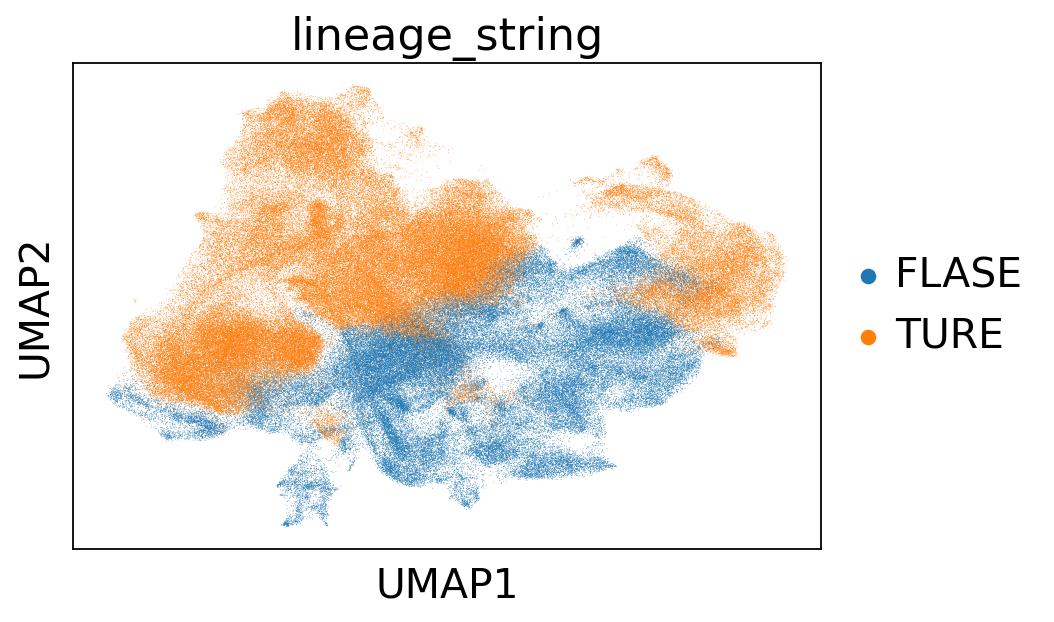

In [51]:
sc.pl.umap(adata,color="lineage_string",save="6.17_lineage_cell_umap.pdf")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


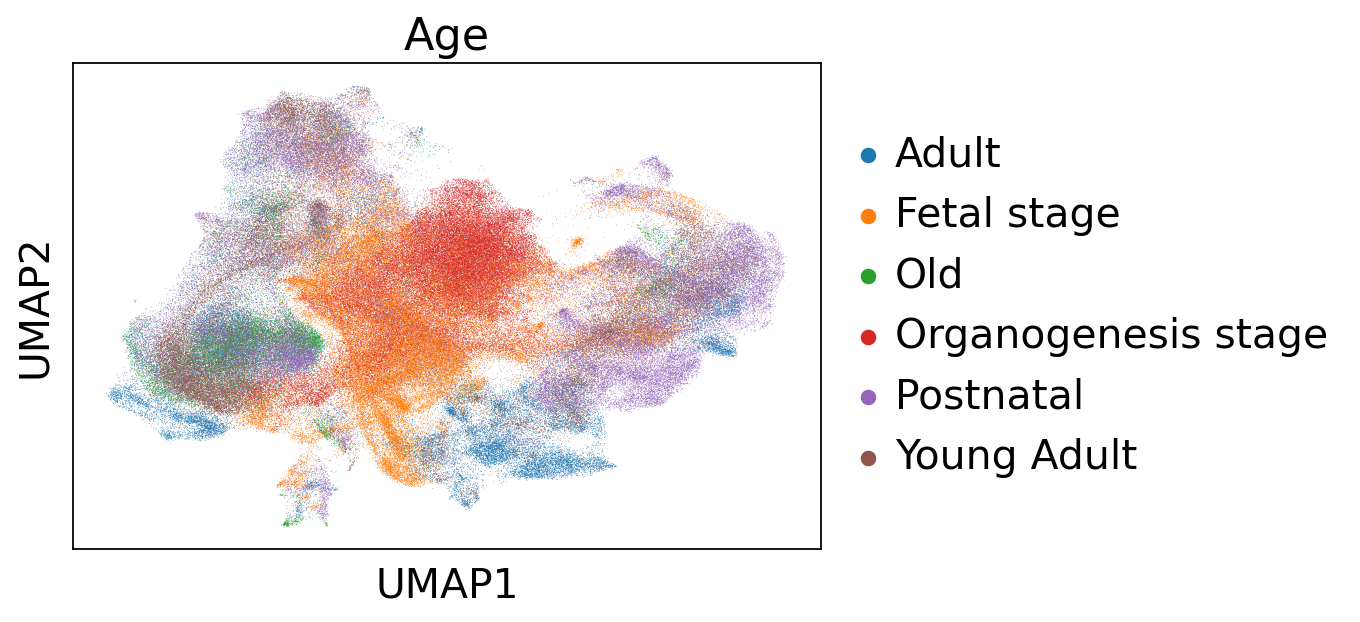

In [46]:
sc.pl.umap(adata,color="Age")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


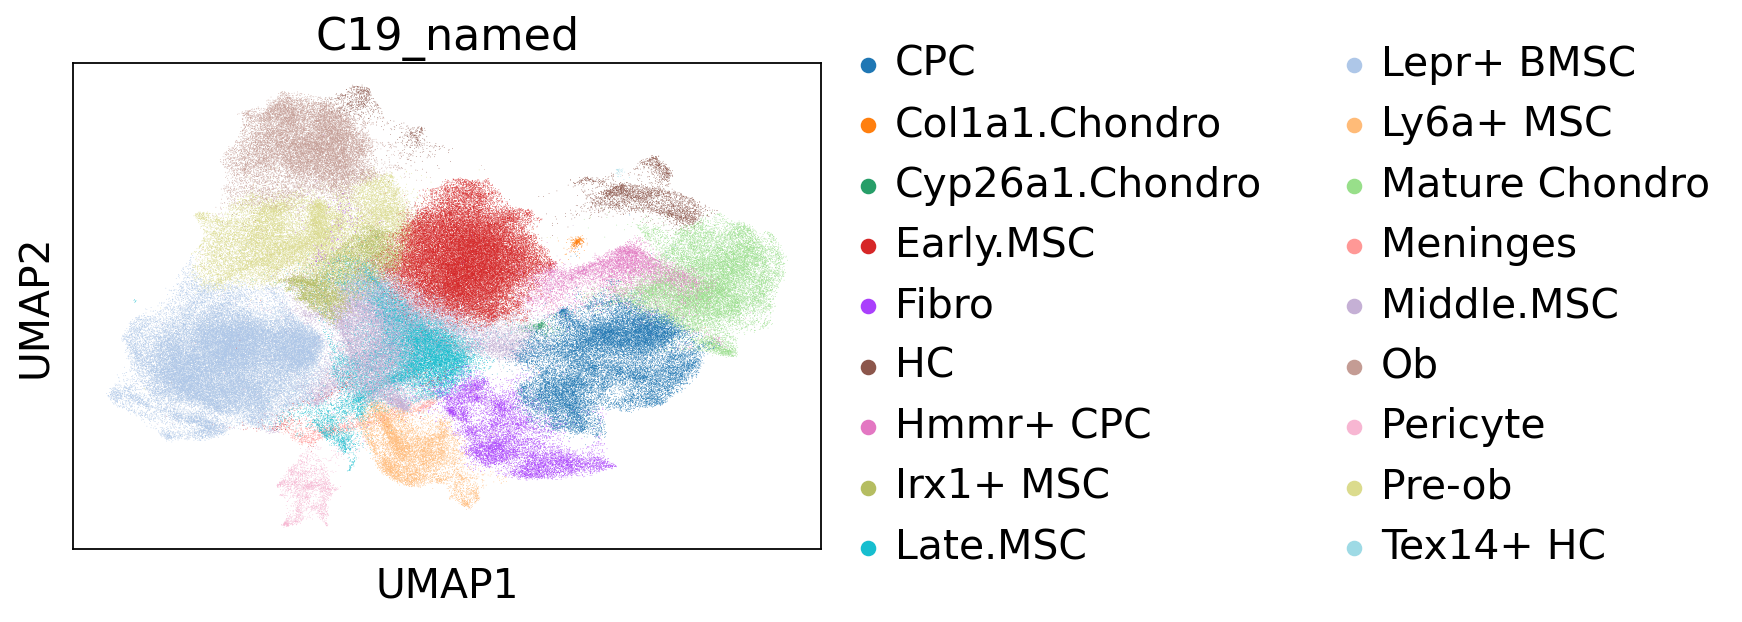

In [48]:
sc.pl.umap(adata,color="C19_named")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


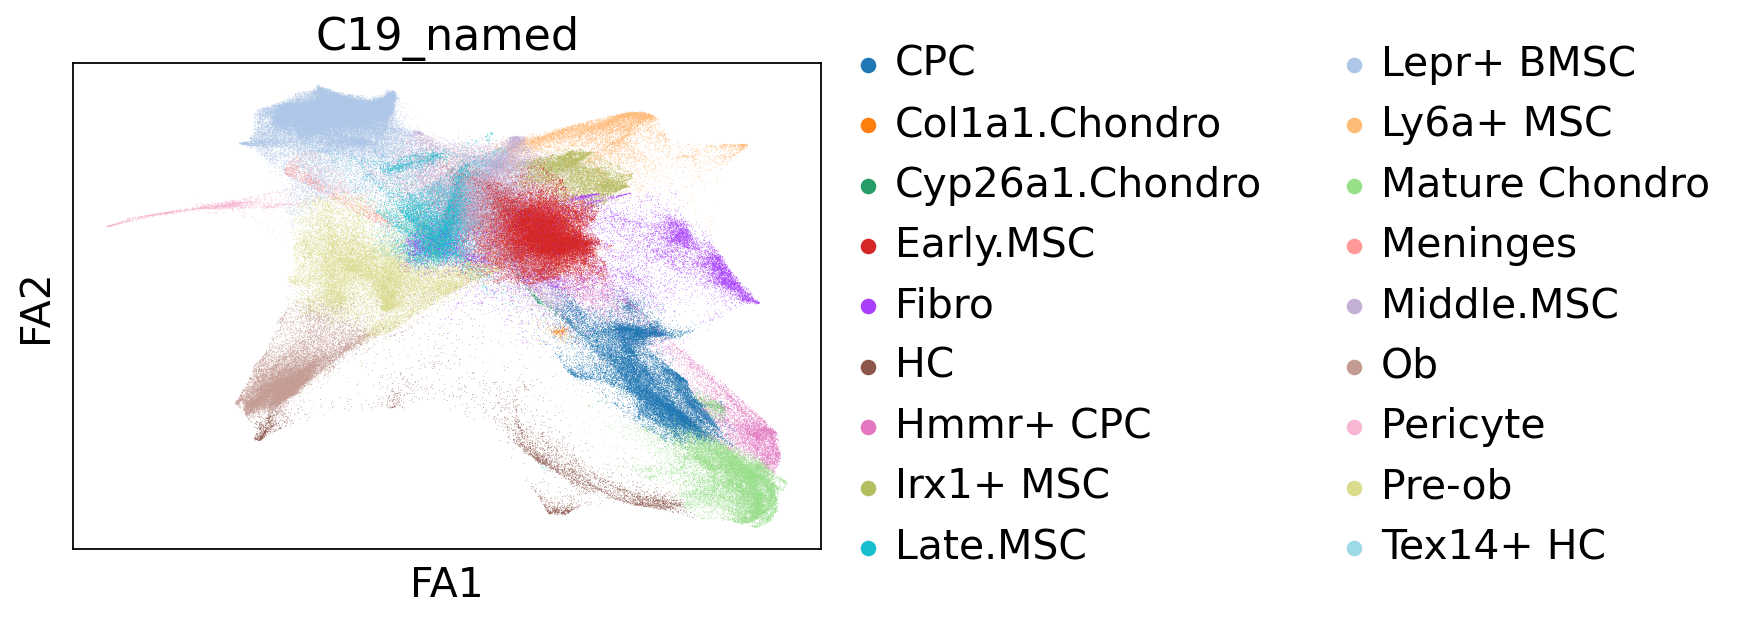

In [49]:
sc.pl.draw_graph(adata,color="C19_named")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


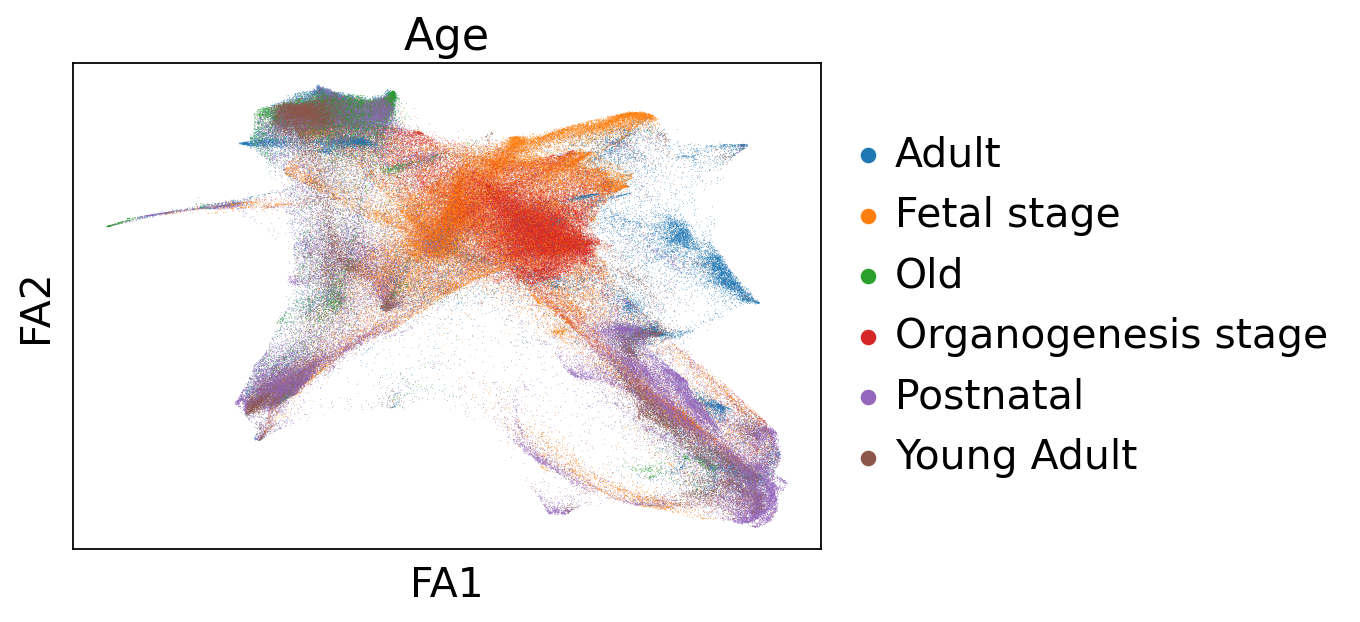

In [45]:
sc.pl.draw_graph(adata,color="Age")

In [41]:
freq = adata.obs.groupby(["lineage_string", "C19_named"]).size()

In [50]:
freq = adata.obs.groupby(["lineage_string", "Project"]).size()
freq

lineage_string  Project                      
FLASE           Ablation_Matsushita               1183
                BMSC-Specification_Kishor         3939
                Bmsc2019_Regev                   15918
                BmscChondro_Long                     5
                BmscEndosteal_Ono                 2494
                BmscTime_Zhong                    2149
                CalvariaP4_Ayturk                 1017
                ChondroOsteo_Long                  235
                CranioSoxc_Angelozzi             13482
                Forelimb_He                       4237
                Frontal_Holmes                    6271
                GrowthPlateP0_Mizuhashi           7115
                GrowthplateSox9_Abdul             4401
                LimbG610C_Gorrell                 3738
                LimbMouse2019_Kelly               4316
                Mandible2020_Chai                 3542
                Maxillary_Bian                    3509
                Mes

In [12]:
adata_lineage=adata[lineage,]

In [13]:
sc.tl.umap(adata_lineage)

/home/gilberthan/anaconda3/envs/scvelo/lib/python3.8/site-packages/scanpy/tools/_umap.py:166: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['umap'] = {'params': {'a': a, 'b': b}}


In [16]:
sc.tl.draw_graph(adata_lineage)

/home/gilberthan/anaconda3/envs/scvelo/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


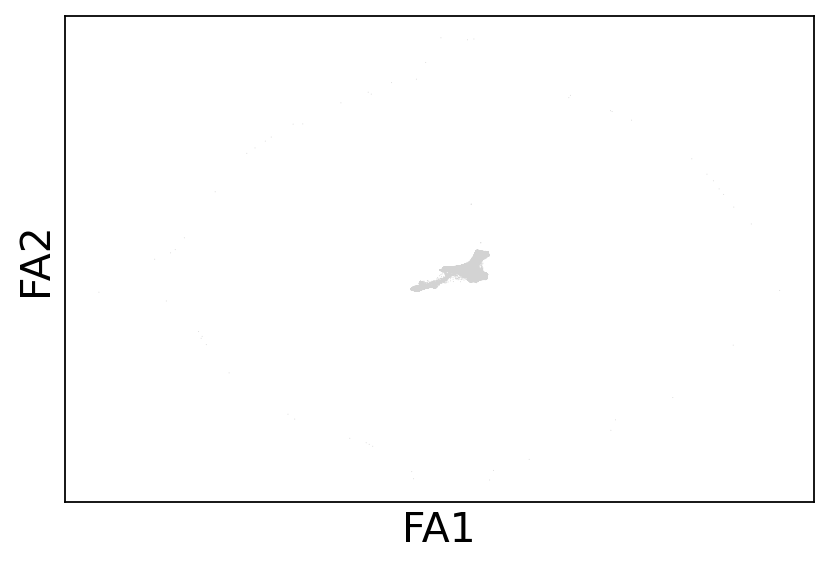

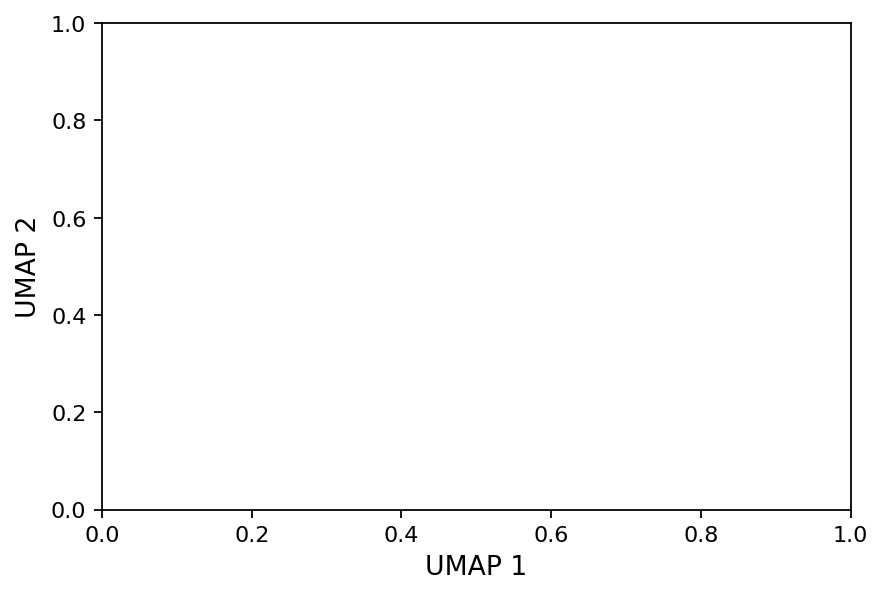

In [31]:
sc.pl.draw_graph(adata_lineage)
# Get the current axis and set axis labels and tick labels


In [30]:
ax.set_ylim(0,50)

AttributeError: 'NoneType' object has no attribute 'set_ylim'

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

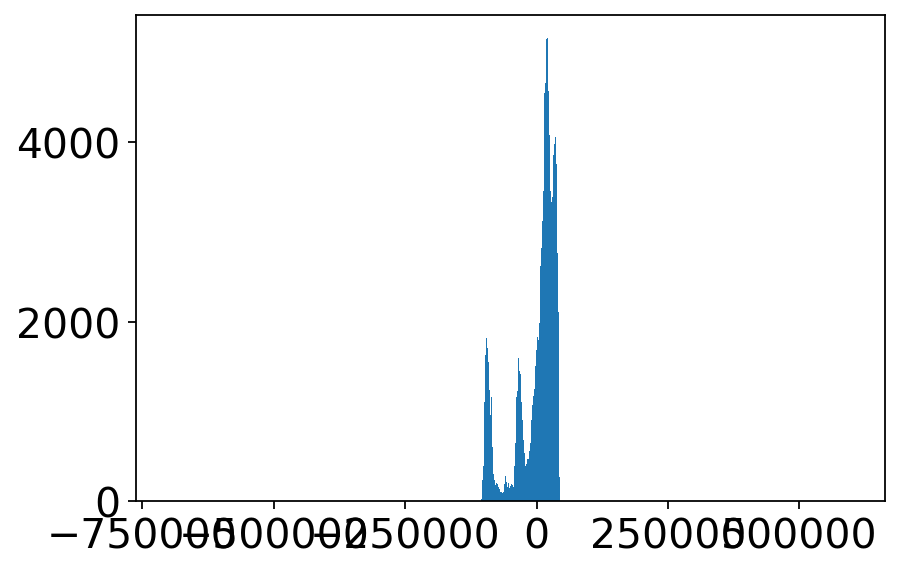

In [35]:
import matplotlib.pyplot as plt
faEmbedding=adata_lineage.obsm['X_draw_graph_fa']
faEmbedding=pd.DataFrame(faEmbedding)
# Generate some random data
data = faEmbedding[0]

# Count the frequency of each value
#value_counts = np.bincount(data)

# Plot the frequency bar plot
plt.hist(data, bins=1000)

(array([ 905., 1526., 1997., 1977., 1931., 1741., 1663., 1369.,  963.,
        1307.,  906.,  498.,  338.,  290.,  246.,  208.,  238.,  263.,
         198.,  190.,  167.,  108.,  120.,  110.,  109.,  122.,  172.,
         282.,  311.,  269.,  182.,  200.,  228.,  149.,  145.,  250.,
         177.,  197.,  185.,  239.,  452.,  820., 1166., 1300., 1483.,
        1753., 1637., 1589., 1423., 1203.,  949.,  866.,  683.,  533.,
         450.,  461.,  486.,  522.,  526.,  577.,  675.,  765.,  922.,
        1193., 1238., 1305., 1460., 1725., 1774., 2001., 2081., 2062.,
        2183., 2691., 2974., 3239., 3328., 3571., 4296., 4903., 5211.,
        5596., 5810., 5703., 5277., 4935., 4200., 3871., 3746., 3781.,
        4042., 4326., 4500., 4639., 4355., 3715., 3163., 2494., 1082.,
         255.]),
 array([-9.99987337e+04, -9.85491400e+04, -9.70995463e+04, -9.56499525e+04,
        -9.42003588e+04, -9.27507651e+04, -9.13011714e+04, -8.98515777e+04,
        -8.84019840e+04, -8.69523902e+04, -8.55027

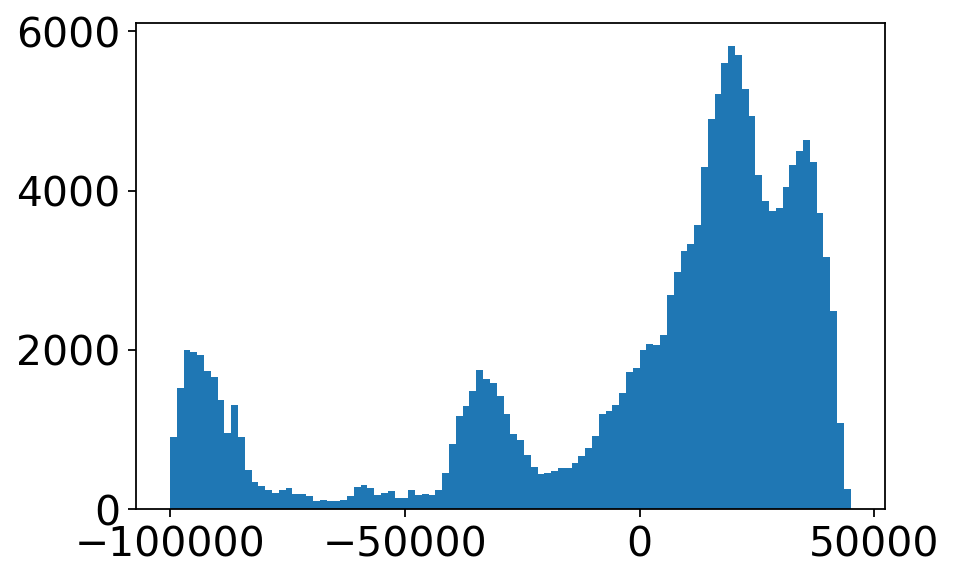

In [113]:
import matplotlib.pyplot as plt
faEmbedding=adata_sub.obsm['X_draw_graph_fa']
faEmbedding=pd.DataFrame(faEmbedding)
# Generate some random data
data = faEmbedding[0]

# Count the frequency of each value
#value_counts = np.bincount(data)

# Plot the frequency bar plot
plt.hist(data, bins=100)

In [173]:
cells_to_keep1 = np.logical_or.reduce((
    (adata_lineage.obsm["X_draw_graph_fa"][:, 1] < 70000)&
    (adata_lineage.obsm["X_draw_graph_fa"][:, 1] > -100000)&
    (adata_lineage.obsm["X_draw_graph_fa"][:, 0] > -100000)&
    (adata_lineage.obsm["X_draw_graph_fa"][:, 0] < 100000),
))

In [110]:
adata_sub = adata_lineage[cells_to_keep, :]


In [108]:
cells_to_keep.sum()

166442

/home/gilberthan/anaconda3/envs/scvelo/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


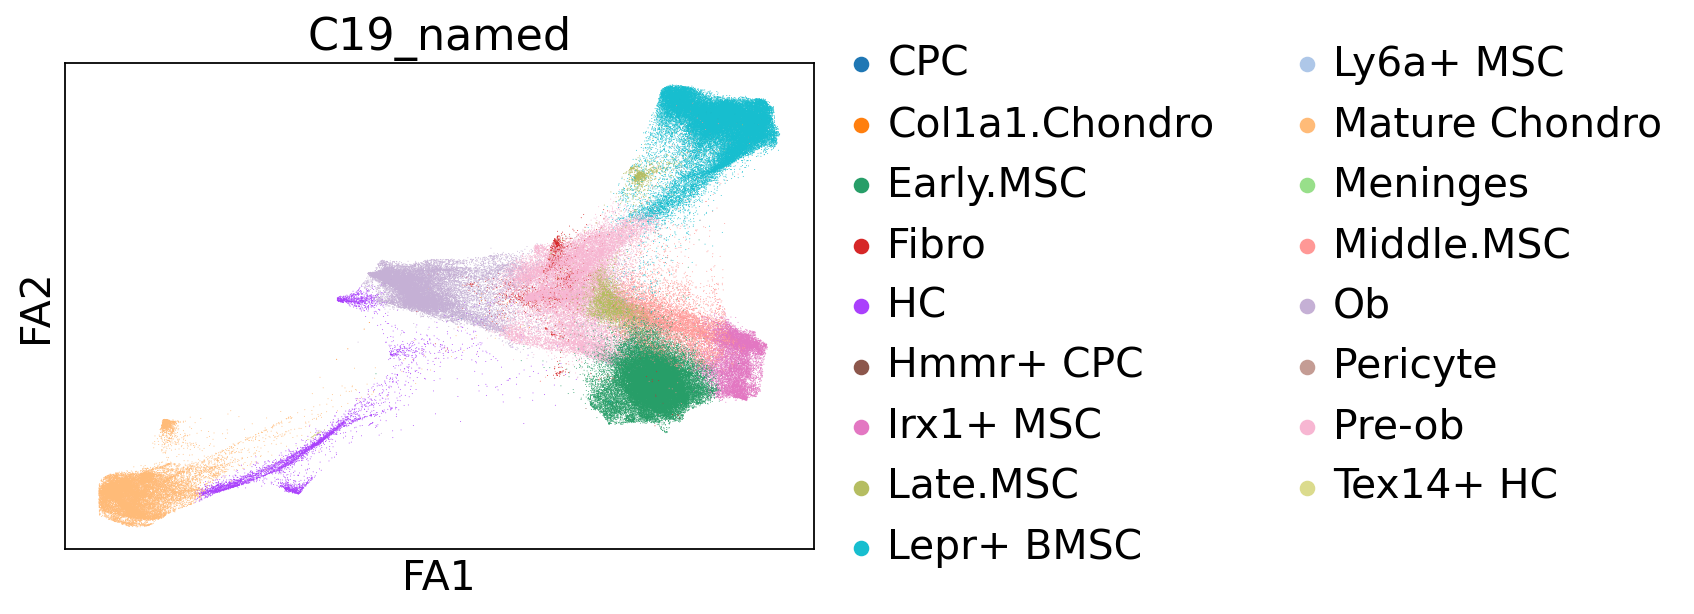

In [114]:
sc.pl.draw_graph(adata_sub,color="C19_named",save="adata_sub_drawgraph")
# Get the current axis and set axis labels and tick labels

/home/gilberthan/anaconda3/envs/scvelo/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


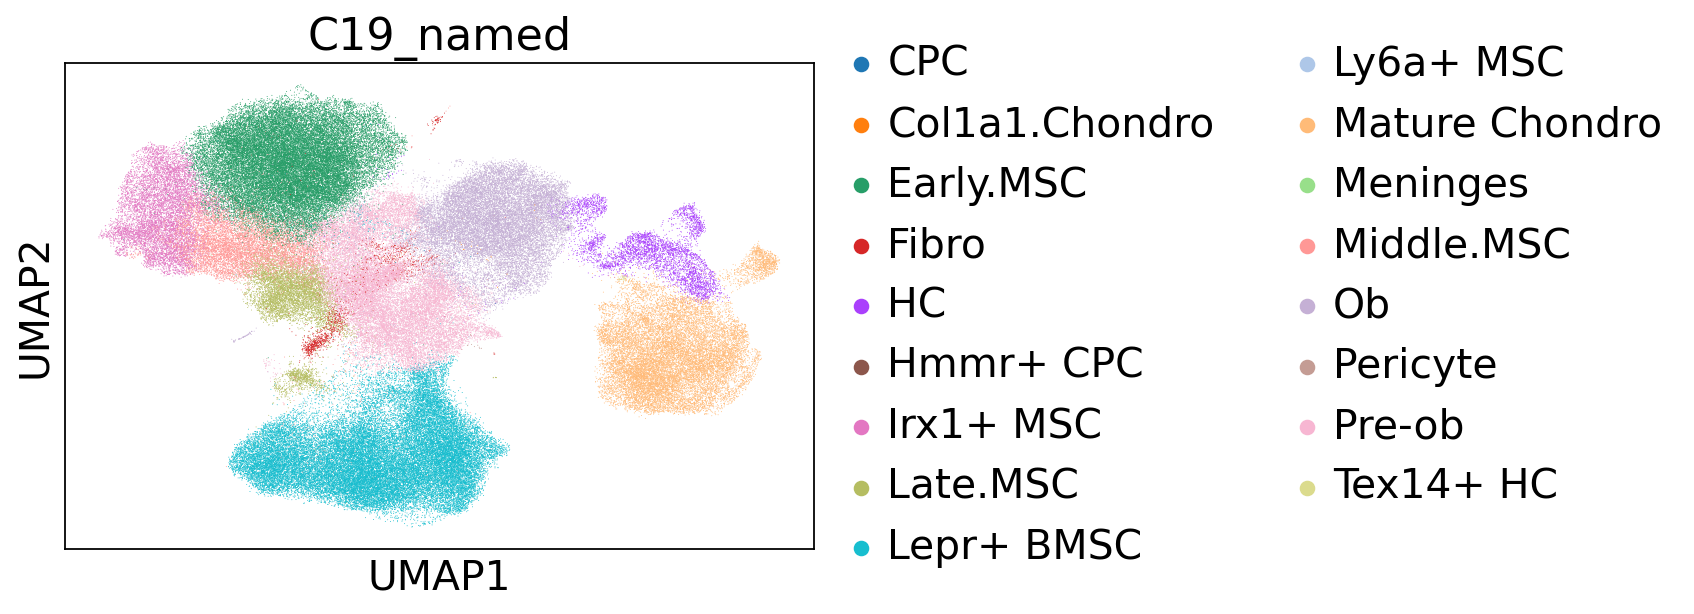

In [115]:
sc.pl.umap(adata_sub,color="C19_named",save="adata_sub")
# Get the current axis and set axis labels and ti

/home/gilberthan/anaconda3/envs/scvelo/lib/python3.8/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list


/home/gilberthan/anaconda3/envs/scvelo/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


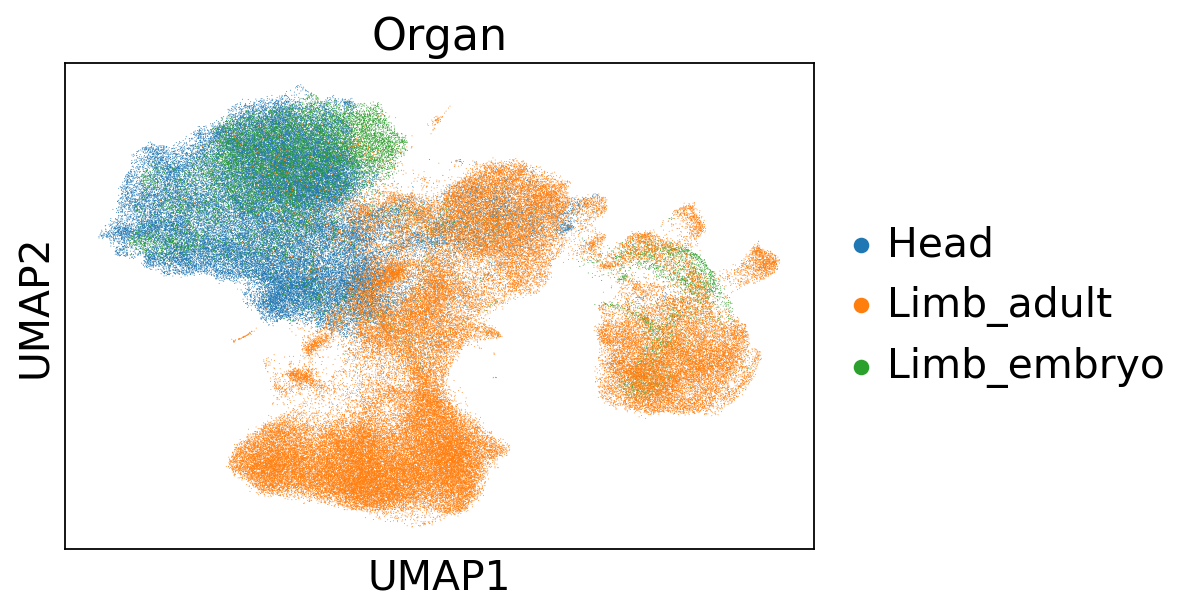

In [116]:
sc.pl.umap(adata_sub,color="Organ",save="adata_sub_organ")

/home/gilberthan/anaconda3/envs/scvelo/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


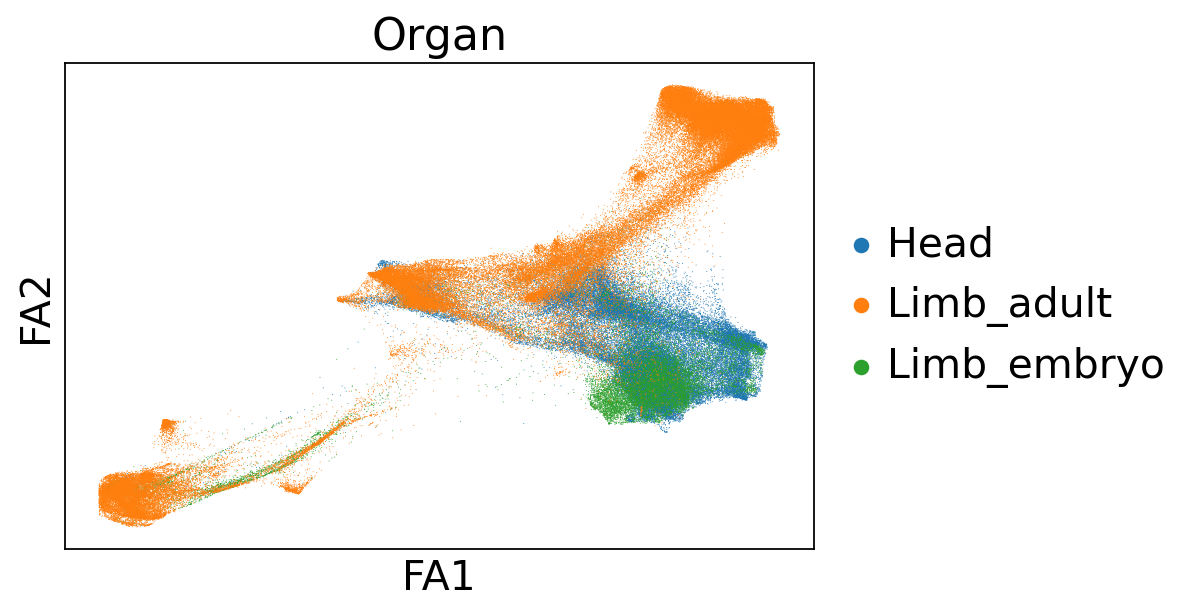

In [117]:
sc.pl.draw_graph(adata_sub,color="Organ",save="adata_sub_organ")

In [118]:
adata_sub

AnnData object with n_obs × n_vars = 166442 × 62934
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'le

In [134]:
adata_sub.uns['iroot']

106

In [133]:
adata_sub.uns['iroot'] = np.flatnonzero(adata_sub.obs['C90_named']  == 'Bglap3.Ob')[0]

In [ ]:
sc.tl.dpt(adata_sub)

/home/gilberthan/anaconda3/envs/scvelo/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


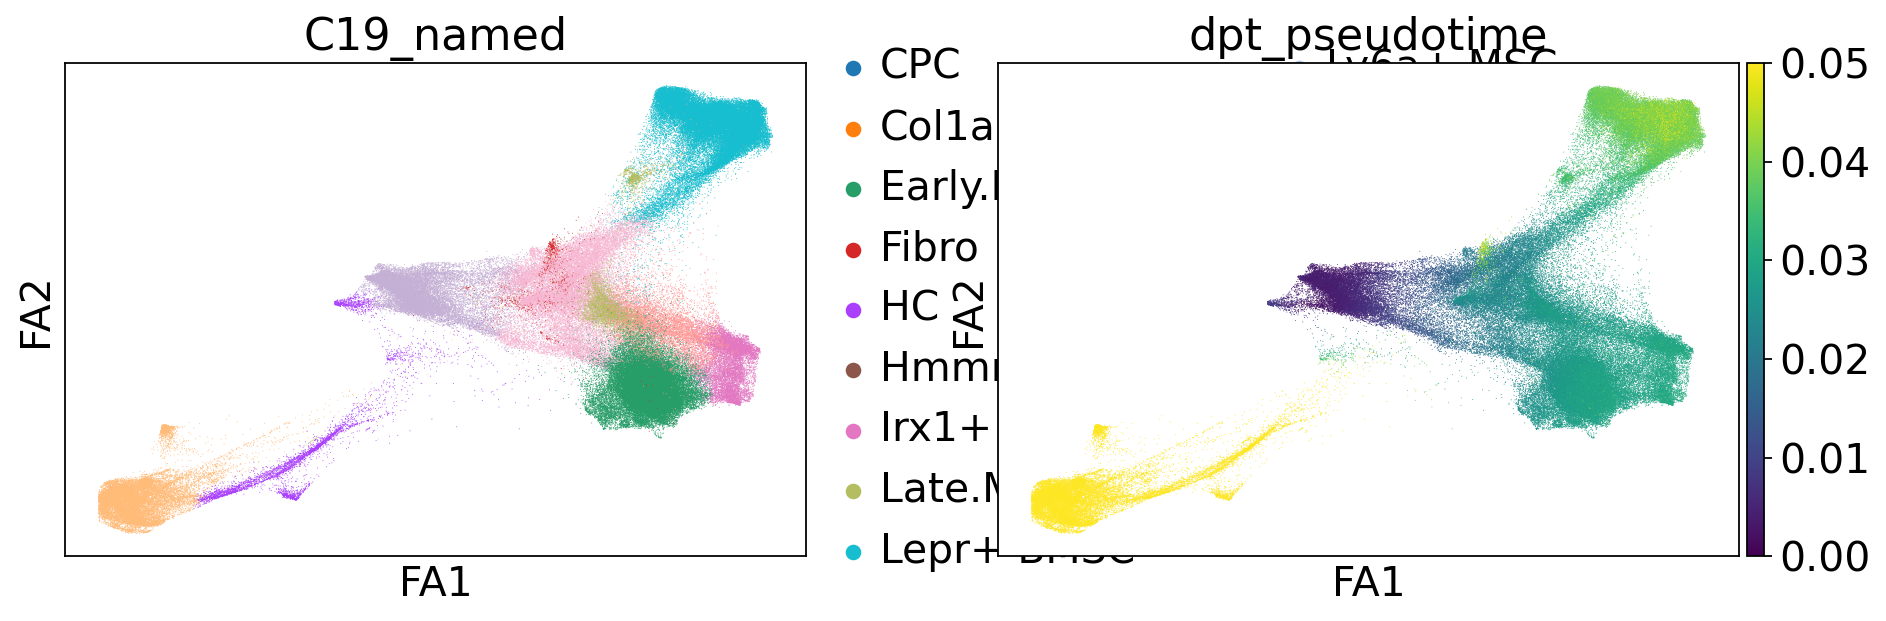

In [376]:
sc.pl.draw_graph(adata_sub, color=['C19_named', 'dpt_pseudotime'],vmax=0.05,save="pseduotime_not_norm")

In [143]:
adata_sub

AnnData object with n_obs × n_vars = 166442 × 62934
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'le

(array([1.6133e+04, 8.2980e+03, 7.5474e+04, 3.8823e+04, 5.3490e+03,
        2.6400e+02, 1.3600e+02, 1.4700e+02, 2.4100e+02, 3.4700e+02,
        4.3300e+02, 3.7600e+02, 4.3700e+02, 5.9200e+02, 5.1000e+02,
        6.8400e+02, 1.0310e+03, 2.1710e+03, 4.2770e+03, 5.0020e+03,
        3.0940e+03, 1.4010e+03, 6.4300e+02, 2.9200e+02, 1.4300e+02,
        7.0000e+01, 2.7000e+01, 1.9000e+01, 8.0000e+00, 4.0000e+00,
        5.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.00

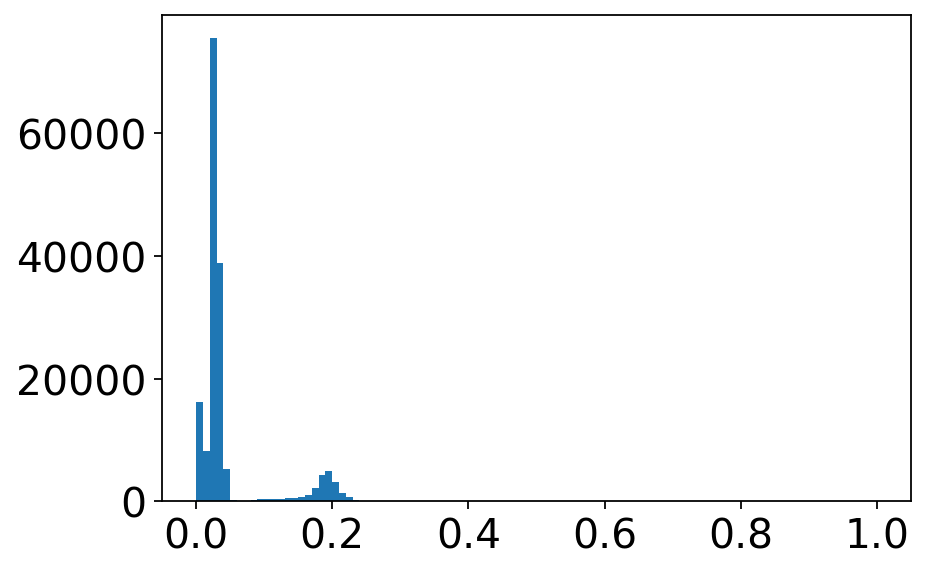

In [145]:
dpt=adata_sub.obs["dpt_pseudotime"]
dpt=pd.DataFrame(dpt)
# Generate some random data


# Count the frequency of each value
#value_counts = np.bincount(data)

# Plot the frequency bar plot
plt.hist(dpt, bins=100)

In [202]:
cells_to_keep = np.logical_or.reduce((
    (dpt < 0.3),
))

In [203]:
cells_to_keep.sum()

166426

In [204]:
adata_sub=adata_sub[cells_to_keep,:]

In [225]:
lineage_sub=lineage_meta.loc[adata_sub.obs_names]

In [226]:
dpt=adata_sub.obs["dpt_pseudotime"]
dpt=pd.DataFrame(dpt)
chondro_dpt=dpt.loc[lineage_sub["lineage_chondro"]]
mes_dpt=dpt.loc[lineage_sub["lineage_mesenchyme"]]
lepr_dpt=dpt.loc[lineage_sub["lineage_lepr"]]
fa_dpt=dpt.loc[lineage_sub["lineage_laFibro"]]

(array([1.822e+03, 7.109e+03, 2.789e+03, 1.295e+03, 1.089e+03, 1.490e+03,
        1.881e+03, 3.312e+03, 4.896e+03, 2.423e+03, 1.199e+03, 7.580e+02,
        7.370e+02, 4.080e+02, 1.990e+02, 1.420e+02, 9.400e+01, 4.200e+01,
        3.800e+01, 2.400e+01, 1.900e+01, 1.400e+01, 8.000e+00, 4.000e+00,
        6.000e+00, 4.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 4.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 1.000e+0

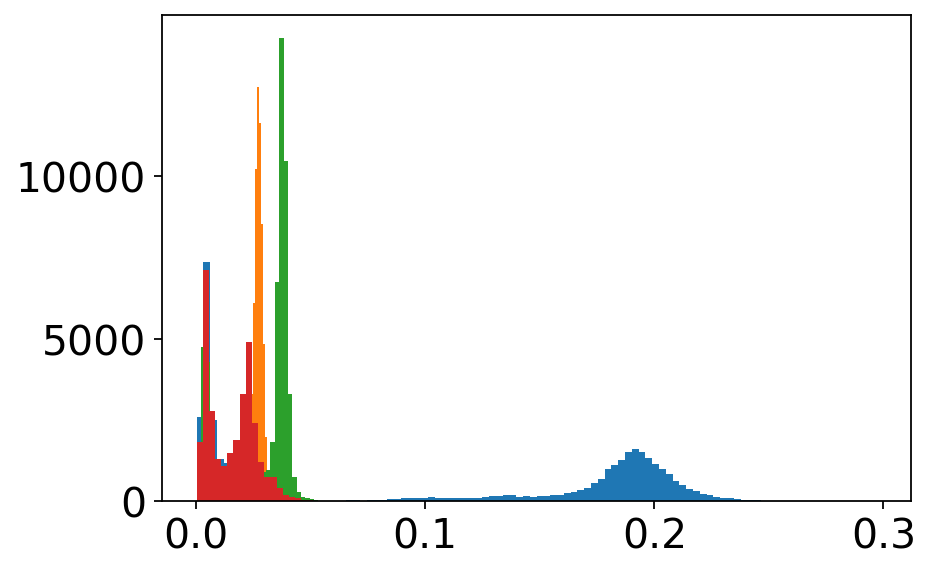

In [227]:
plt.hist(chondro_dpt, bins=100)
plt.hist(mes_dpt, bins=100)
plt.hist(lepr_dpt, bins=100)
plt.hist(fa_dpt, bins=100)

(array([2.583e+03, 7.369e+03, 2.511e+03, 1.310e+03, 1.176e+03, 3.000e+02,
        8.000e+01, 1.690e+02, 2.240e+02, 6.100e+01, 6.900e+01, 9.200e+01,
        5.200e+01, 3.000e+01, 2.700e+01, 1.500e+01, 1.400e+01, 9.000e+00,
        1.500e+01, 1.500e+01, 2.100e+01, 2.600e+01, 3.100e+01, 3.100e+01,
        2.900e+01, 4.400e+01, 4.100e+01, 5.400e+01, 6.400e+01, 7.300e+01,
        1.090e+02, 9.400e+01, 9.800e+01, 1.120e+02, 1.440e+02, 1.130e+02,
        1.170e+02, 1.130e+02, 1.040e+02, 1.130e+02, 1.040e+02, 1.180e+02,
        1.230e+02, 1.620e+02, 1.550e+02, 1.850e+02, 1.840e+02, 1.500e+02,
        1.540e+02, 1.440e+02, 1.710e+02, 1.710e+02, 2.110e+02, 2.120e+02,
        2.460e+02, 2.960e+02, 3.650e+02, 4.180e+02, 5.820e+02, 7.010e+02,
        9.860e+02, 1.124e+03, 1.284e+03, 1.506e+03, 1.611e+03, 1.531e+03,
        1.340e+03, 1.156e+03, 1.000e+03, 8.510e+02, 6.140e+02, 4.970e+02,
        3.740e+02, 3.170e+02, 2.330e+02, 1.910e+02, 1.450e+02, 1.210e+02,
        9.800e+01, 7.100e+01, 4.800e+0

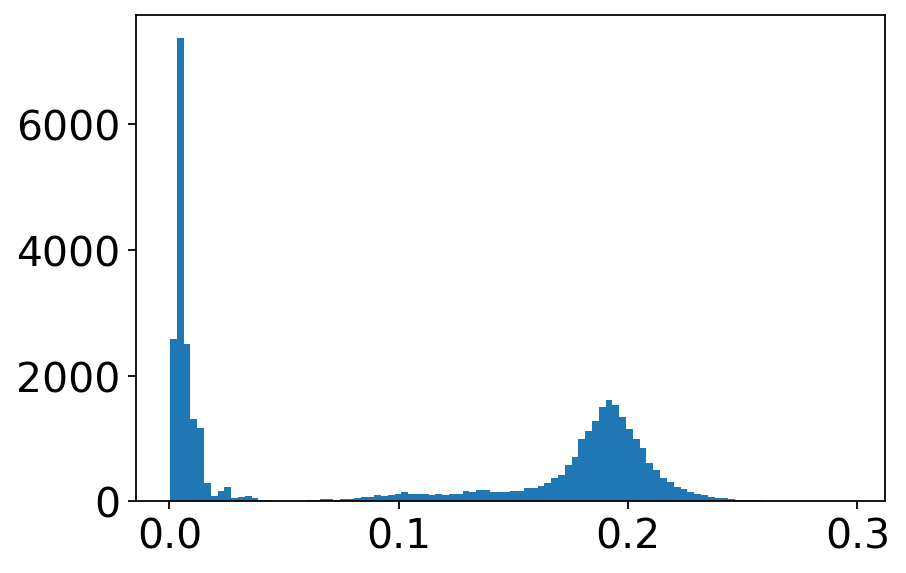

In [228]:
plt.hist(chondro_dpt, bins=100)

(array([9.1000e+01, 7.8000e+02, 1.2020e+03, 7.4400e+02, 4.9100e+02,
        2.9300e+02, 2.8100e+02, 3.3600e+02, 4.3200e+02, 5.2800e+02,
        6.2800e+02, 1.1510e+03, 3.1660e+03, 5.7790e+03, 1.6295e+04,
        2.4378e+04, 1.3362e+04, 2.5670e+03, 2.2100e+02, 4.1000e+01,
        1.9000e+01, 4.0000e+00, 4.0000e+00, 2.0000e+00, 2.0000e+00,
        2.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.          , 0.001769165 , 0.0035383301, 0.0053074951,
        0.0070766602, 0.0088458257, 0.0106149903, 0.0123841558,
        0.0141533203, 0.0159224868, 0.0176916514, 0.0194608159,
        0.0212299805, 0.022999147 , 0.0247683115, 0.0265374761,
        0.0283066407, 0.0300758071, 0.0318449736, 0.0336141363

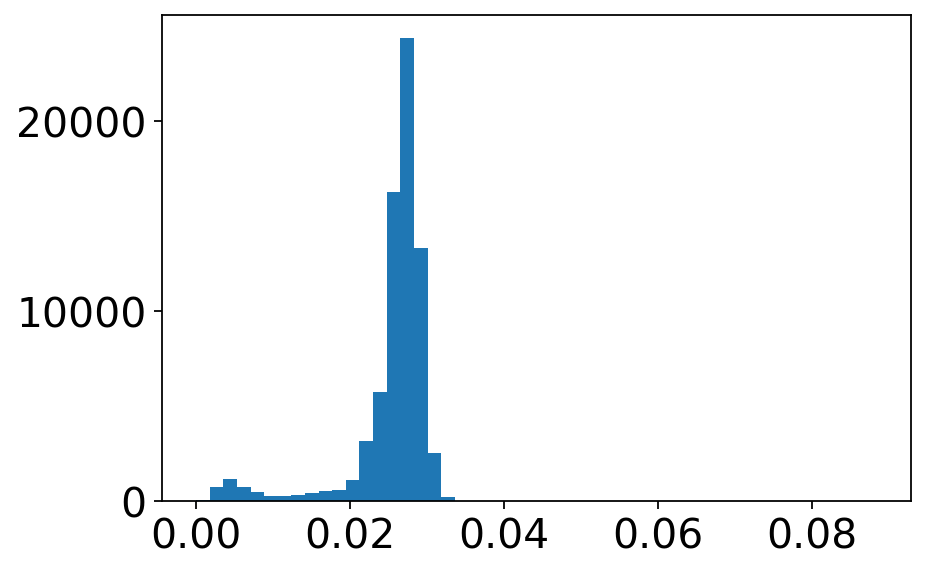

In [230]:
plt.hist(mes_dpt, bins=50)

In [238]:
mes_max = np.percentile(mes_dpt, 99)

In [239]:
mes_max

0.031117099747061727

In [240]:
mes_dpt_norm=mes_dpt/mes_max

In [350]:
lepr_max = np.percentile(lepr_dpt, 99)

In [351]:
la_max = np.percentile(fa_dpt, 99)

In [352]:
la_max

0.04320322379469869

In [353]:
lepr_max

0.04440841265022755

In [246]:
lepr_dpt_norm=lepr_dpt/lepr_max
la_dpt_norm=fa_dpt/la_max

In [255]:
lineage_chondro_only=lineage_sub["lineage_chondro"] & ~ lineage_sub["lineage_lepr"] & ~ lineage_sub["lineage_laFibro"]

In [256]:
chondro_only_dpt=dpt.loc[lineage_chondro_only]

(array([1.930e+02, 1.480e+02, 5.300e+01, 1.300e+01, 4.000e+01, 2.500e+01,
        2.400e+01, 1.400e+01, 1.000e+01, 2.300e+01, 5.000e+01, 6.300e+01,
        7.300e+01, 9.600e+01, 1.500e+02, 1.920e+02, 2.230e+02, 2.480e+02,
        2.350e+02, 2.140e+02, 2.200e+02, 2.950e+02, 3.450e+02, 3.200e+02,
        3.070e+02, 3.420e+02, 4.280e+02, 5.500e+02, 8.040e+02, 1.335e+03,
        2.125e+03, 2.837e+03, 3.111e+03, 2.458e+03, 1.813e+03, 1.076e+03,
        6.770e+02, 4.150e+02, 2.630e+02, 1.640e+02, 1.020e+02, 5.800e+01,
        4.100e+01, 2.800e+01, 1.700e+01, 1.100e+01, 8.000e+00, 7.000e+00,
        2.000e+00, 3.000e+00]),
 array([0.0010871013, 0.0070060845, 0.0129250679, 0.0188440513,
        0.0247630347, 0.030682018 , 0.0366009995, 0.0425199829,
        0.0484389663, 0.0543579496, 0.060276933 , 0.0661959127,
        0.0721148998, 0.0780338794, 0.0839528665, 0.0898718461,
        0.0957908332, 0.1017098129, 0.1076288   , 0.1135477796,
        0.1194667667, 0.1253857464, 0.131304726 , 0.1372

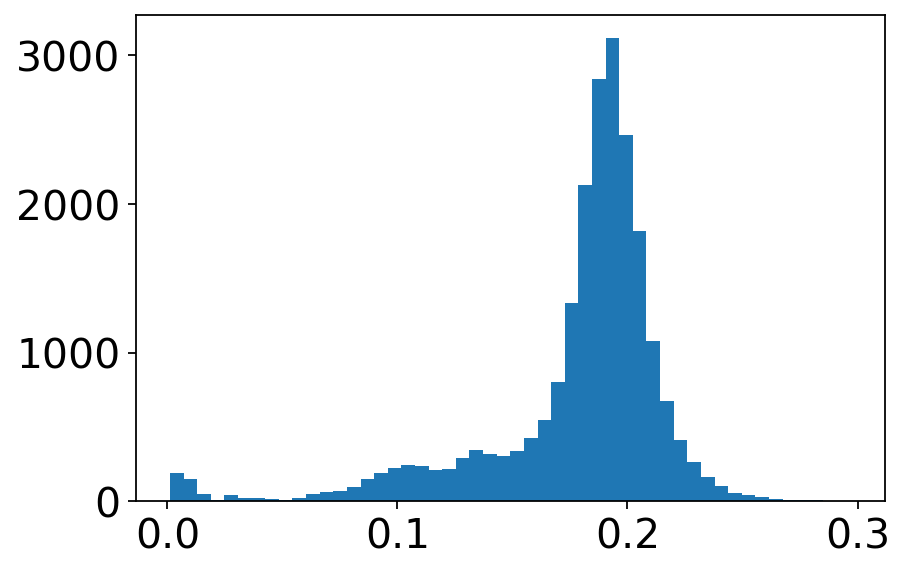

In [259]:
plt.hist(chondro_only_dpt, bins=50)

In [260]:
chondro_max = np.percentile(chondro_only_dpt, 99)

In [262]:
chondro_only_dpt_norm=chondro_only_dpt/chondro_max

In [267]:
dpt_norm=dpt

In [270]:
adata_sub.obs["dpt_norm"]=0

In [271]:
mes_dpt.index

Index(['Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0',
       'Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0',
       'Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0',
       'Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0',
       'Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0',
       'Suture2021_Farmer_E17_AAAGTAGTCTAACTTC-1_1-0',
       'Suture2021_Farmer_E17_AACACGTGTTGTGGAG-1_1-0',
       'Suture2021_Farmer_E17_AACACGTTCGTAGATC-1_1-0',
       'Suture2021_Farmer_E17_AACCATGTCCGCAAGC-1_1-0',
       'Suture2021_Farmer_E17_AACCGCGCACCAGCAC-1_1-0',
       ...
       'PerichondrialP21_Matsushita_Prrx1creE11.5_TTTGGTTGTGTCATCA-1_3-1',
       'PerichondrialP21_Matsushita_Prrx1creE11.5_TTTGGTTTCAAACGAA-1_3-1',
       'PerichondrialP21_Matsushita_Prrx1creE11.5_TTTGTTGAGACTTCGT-1_3-1',
       'PerichondrialP21_Matsushita_Prrx1creE11.5_TTTGTTGAGCACTCAT-1_3-1',
       'PerichondrialP21_Matsushita_Prrx1creE11.5_TTTGTTGAGGATTACA-1_3-1',
       'PerichondrialP21_Matsushita_Prrx1creE11.5_TTTGTTGCATAACA

In [309]:
data = {'A': [1, 2, 3, 4, 5],
        'B': [100, 200, 300, 400, 500],
        'C': ['a', 'b', 'c', 'd', 'e']}
df = pd.DataFrame(data)

# create an index array to select rows
idx = np.array([0, 2, 4])

# create an array of new values
new_vals = np.array([10, 30, 50])

# set new values for column B using the index array
df.loc[idx, 'B'] = new_vals

In [319]:
adata_sub.obs.loc[mes_dpt.index.values,'dpt_norm']=mes_dpt_norm.values
adata_sub.obs.loc[lepr_dpt.index.values,'dpt_norm']=lepr_dpt_norm.values
adata_sub.obs.loc[chondro_only_dpt.index.values,'dpt_norm']=chondro_only_dpt_norm.values
adata_sub.obs.loc[fa_dpt.index.values,'dpt_norm']=la_dpt_norm.values

In [320]:
adata_sub.obs["dpt_norm"]

Unnamed: 0
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0    0.828343
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0    0.404035
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0    0.360761
Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0    0.680295
Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0    0.732094
                                                  ...   
TTTGACTGTATTTCCT-1_5-1-2                        0.493113
TTTGACTGTTGCATTG-1_5-1-2                        0.543739
TTTGACTTCTTGGGCG-1_5-1-2                        0.379180
TTTGGAGCAGCGACAA-1_5-1-2                        0.076878
TTTGGTTCACTACTTT-1_5-1-2                        0.243686
Name: dpt_norm, Length: 166426, dtype: float64

(array([1.0277e+04, 6.2360e+03, 3.6110e+03, 6.9240e+03, 1.0665e+04,
        1.2471e+04, 6.8762e+04, 4.5361e+04, 1.6410e+03, 2.3800e+02,
        8.8000e+01, 3.4000e+01, 2.1000e+01, 1.2000e+01, 1.1000e+01,
        6.0000e+00, 4.0000e+00, 4.0000e+00, 5.0000e+00, 4.0000e+00,
        4.0000e+00, 4.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 3.0000e+00, 4.0000e+00, 1.0000e+00, 3.0000e+00,
        1.0000e+00, 4.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        2.0000e+00, 1.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.          , 0.1244319916, 0.2488639832, 0.3732959747,
        0.4977279663, 0.6221599579, 0.7465919495, 0.871023941 ,
        0.9954559326, 1.1198879242, 1.2443199158, 1.3687519073,
        1.4931838989, 1.6176158905, 1.7420478821, 1.8664798737,
        1.9909118652, 2.1153438568, 2.2397758484, 2.36420784  

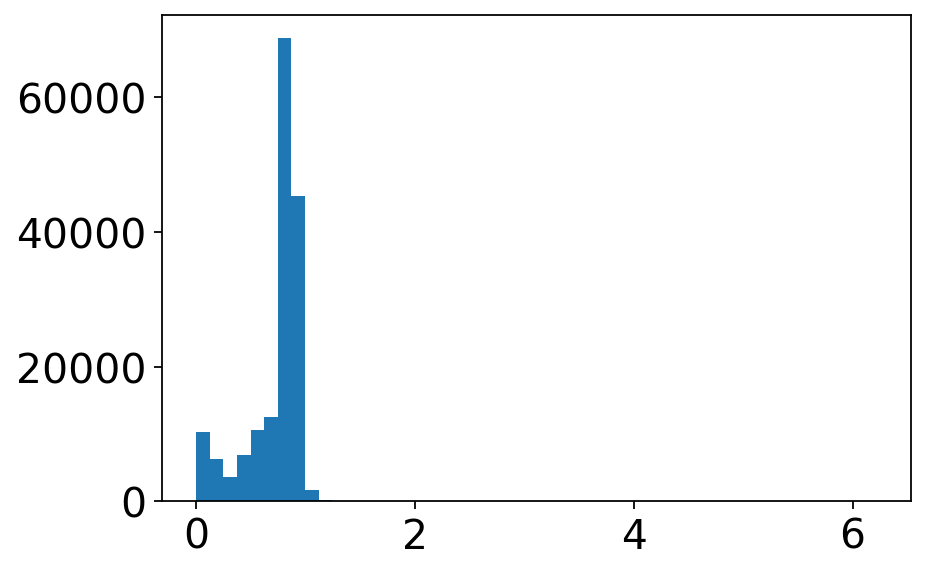

In [322]:
plt.hist(adata_sub.obs["dpt_norm"].values, bins=50)

In [365]:
cells_to_keep3 = np.logical_or.reduce((
    (adata_sub.obs["dpt_norm"].values < 1.2),
))

In [366]:
cells_to_keep3.sum()

166144

In [367]:
adata_sub=adata_sub[cells_to_keep3,:]

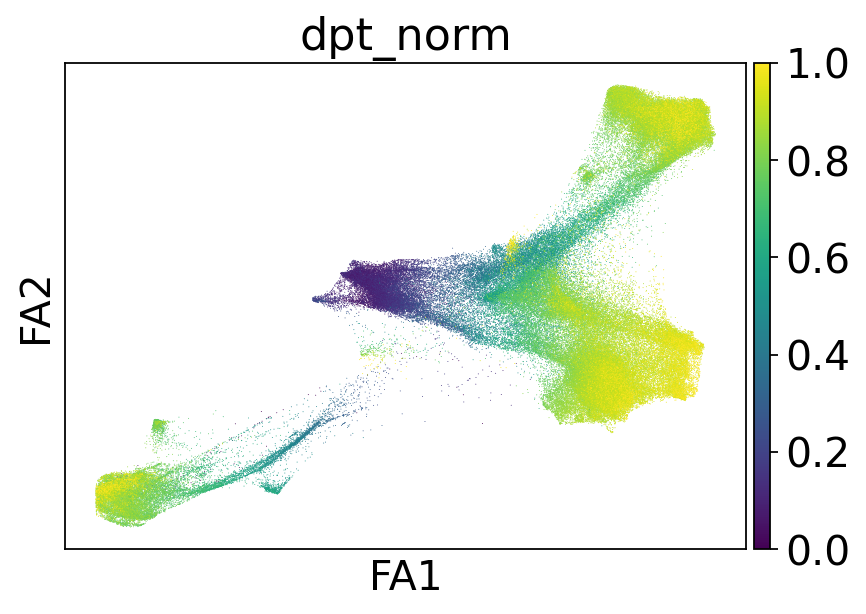

In [371]:
sc.pl.draw_graph(adata_sub,color="dpt_norm",vmax=1,save="dpt_norm")

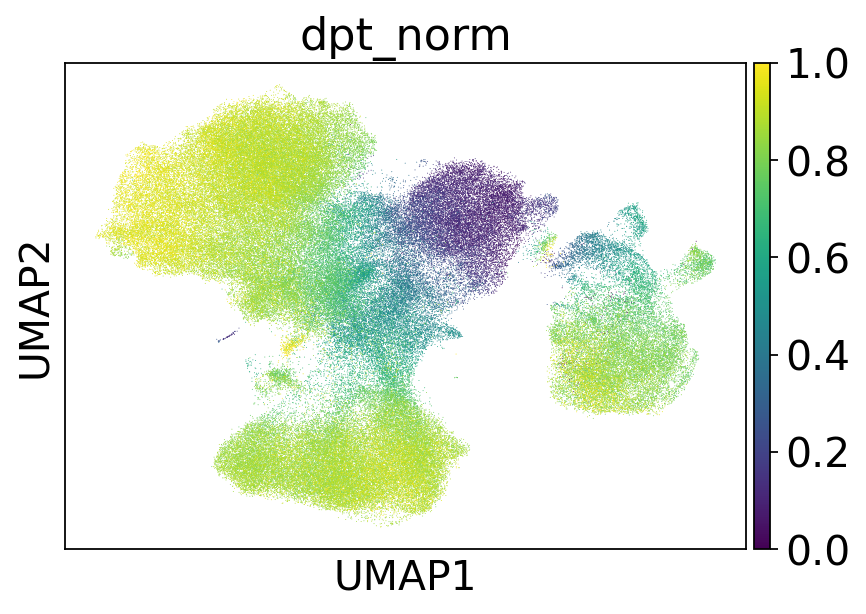

In [372]:
sc.pl.umap(adata_sub,color="dpt_norm",vmax=1,save="dpt_norm")

In [ ]:
adata_sub.write_h5ad("../../important_processed_data/6.18_dpt_wt_sub.h5ad")

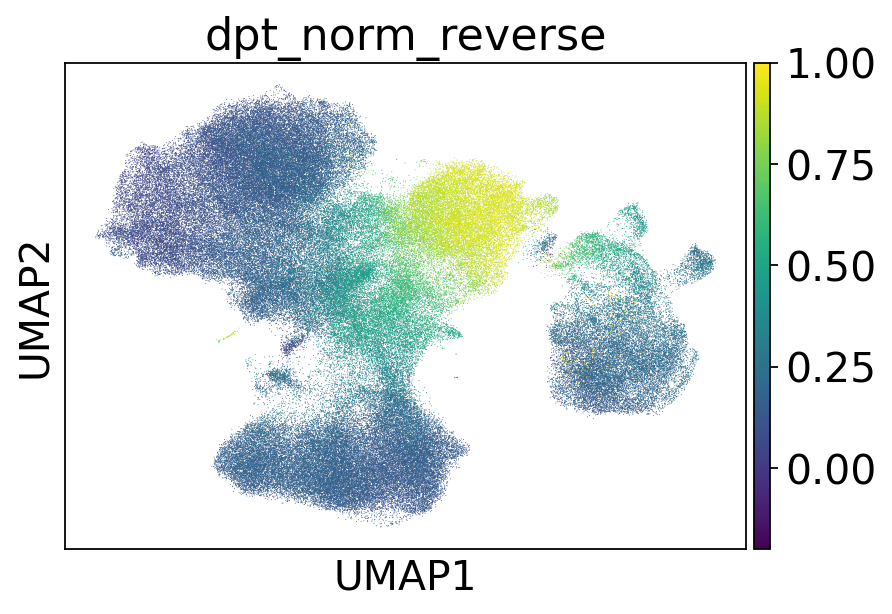

In [379]:
sc.pl.umap(adata_sub,color="dpt_norm_reverse",vmax=1,save="dapt_norm_reverse")

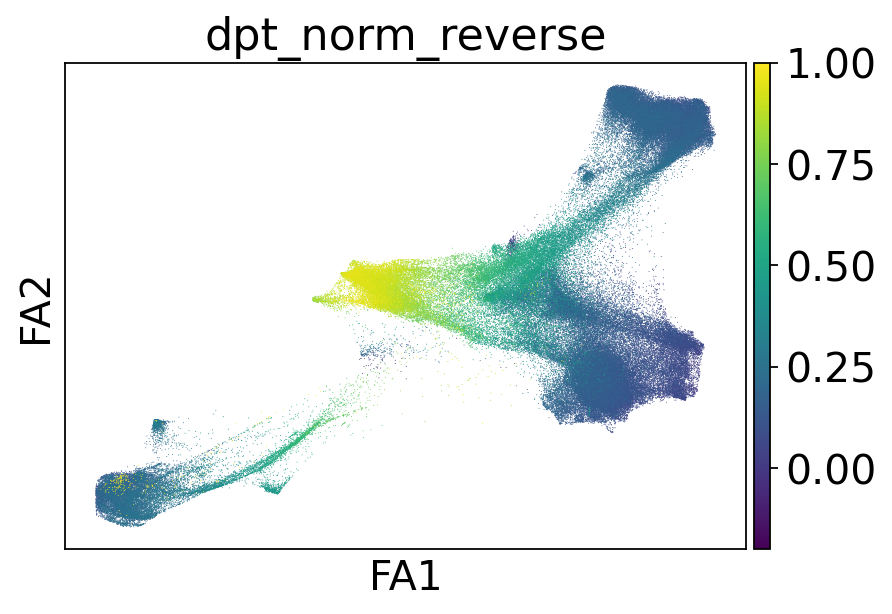

In [380]:
sc.pl.draw_graph(adata_sub,color="dpt_norm_reverse",vmax=1,save="dpt_norm_reverse")

In [1]:
adata_sub

NameError: name 'adata_sub' is not defined

In [377]:
adata_sub.obs["dpt_norm_reverse"]=1-adata_sub.obs["dpt_norm"]

/tmp/ipykernel_1073483/3954610255.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sub.obs["dpt_norm_reverse"]=1-adata_sub.obs["dpt_norm"]


In [381]:
vk=cr.kernels.PseudotimeKernel(adata_sub, time_key = 'dpt_norm_reverse')

In [382]:
vk.compute_transition_matrix(threshold_scheme="soft", nu=0.5)

Computing transition matrix based on `dpt_norm_reverse`


  0%|          | 0/166144 [00:00<?, ?cell/s]

    Finish (0:00:53)


<PseudotimeKernel>

In [384]:
vk.compute_projection(basis="draw_graph_fa")

Projecting transition matrix onto `draw_graph_fa`
Adding `adata.obsm['T_fwd_draw_graph_fa']`
    Finish (0:01:40)


adata_sub

saving figure to file /home/gilberthan/Desktop/disk1/limb/3.9_wt_integrate/result/5.23_pesduotime/scvelo_dpt_stream.pdf


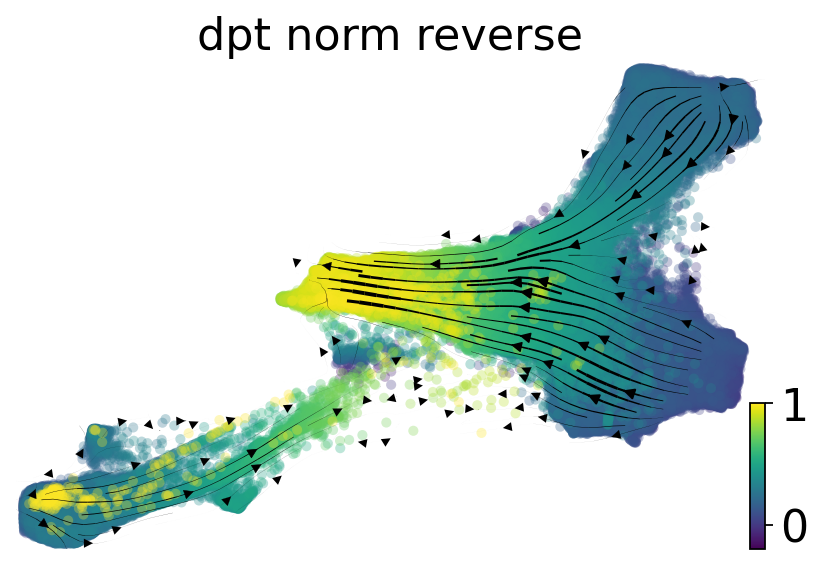

In [404]:
scv.pl.velocity_embedding_stream(
    adata_sub, color="dpt_norm_reverse", vkey="T_fwd", basis="draw_graph_fa", legend_loc="right",save="dpt_stream"
)

Simulating `20` random walks of maximum length `41536`


  0%|          | 0/20 [00:00<?, ?sim/s]

    Finish (0:22:29)
Plotting random walks


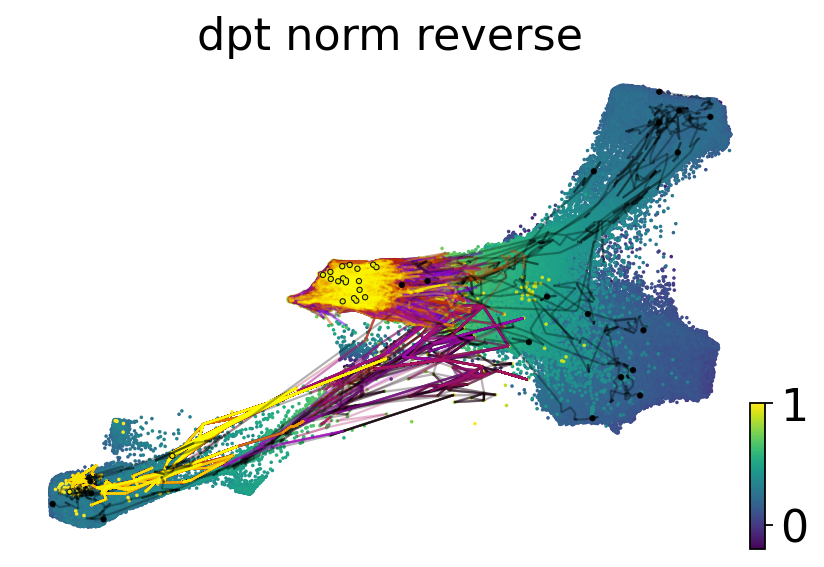

In [407]:
vk.plot_random_walks(
    n_sims=20,
    basis="draw_graph_fa",
    color="dpt_norm_reverse",
    legend_loc="right",
    seed=1,save="random_walk"
)

In [398]:
adata_sub.obs["C7_named"].cat.categories

Index(['Chondro', 'Fibroblast', 'Lepr+ BMSC', 'Ly6a+ MSC', 'MSC', 'Ob',
       'Pericyte'],
      dtype='object')

In [400]:
adata_sub

AnnData object with n_obs × n_vars = 166144 × 62934
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'le

In [408]:
from cellrank.estimators import GPCCA

g_fwd = GPCCA(vk)
print(g_fwd)

GPCCA[n=166144, kernel=<PseudotimeKernel[dnorm=False, scheme=soft, b=10.0, nu=0.5]>]


In [410]:
g_fwd.compute_schur(n_components=20)
g_fwd.plot_spectrum(real_only=True)

MemoryError: Unable to allocate 206. GiB for an array with shape (166144, 166144) and data type float64